<a href="https://colab.research.google.com/github/Nyandwi/replicating-tesla-network-architecture/blob/main/replicating_tesla_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Replicating Tesla Architecture

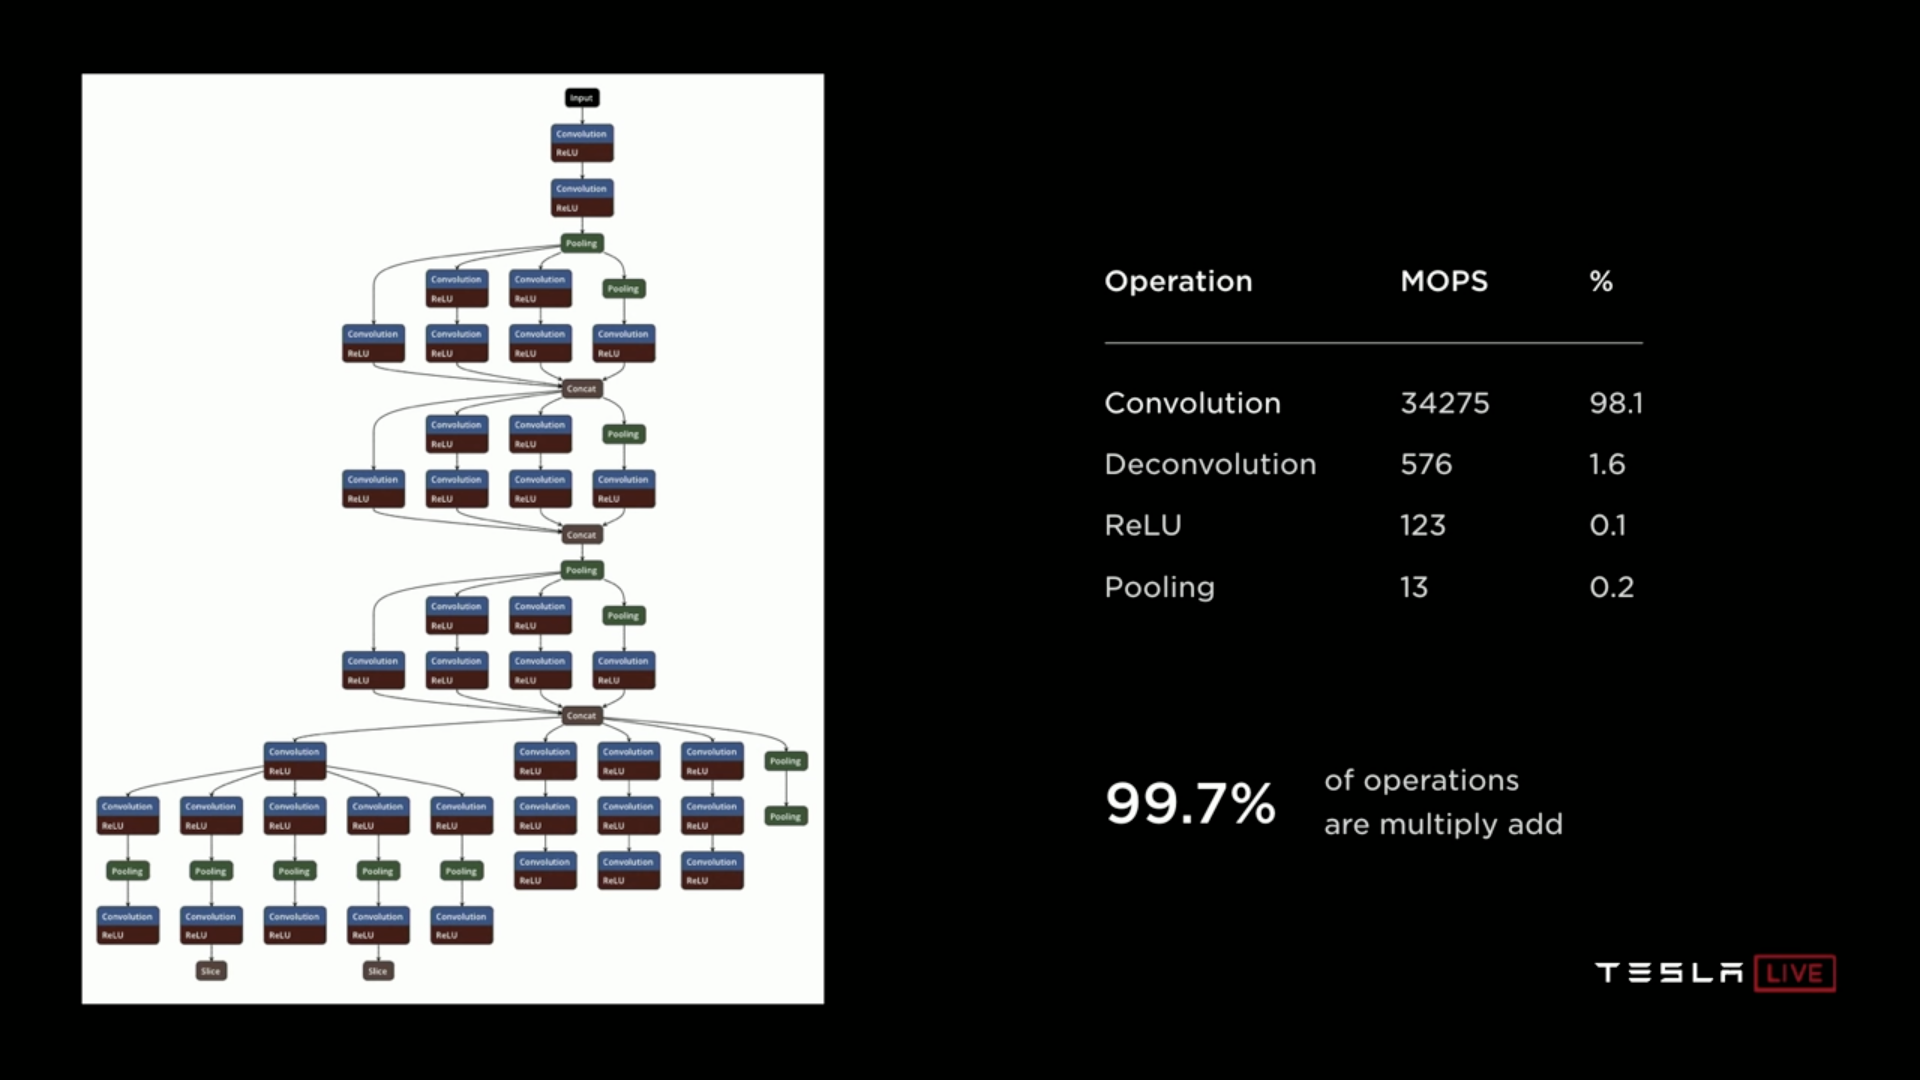

The above screencast was taken from Tesla Autonomy Day. Record available on [Youtube](https://www.youtube.com/watch?v=Ucp0TTmvqOE&t=8822s).

### *Personal Assumptions*

* Assumed that the input image is (224, 224,3)
* Assumed the hyperparemeters in convolutional layers (filters, kernel size, padding). Some internal feature maps are padded while others not. 
* Assumed that Maxpooling is used as pooling option to compress the feature maps produced by the convolution layers while retaining the clear parts of image or high pixel values. In some blocks, they are compressed by 2 (both sides) and in some blocks, they are not to preserve the network symmmetry. Whole of this things are my assumptions :) and it is not done to convey any practical use case.
* There is no deconvolution in the screencast above, so it is not part of the network to implement. Deconvolution does the reverse of the convolution. It restores feature maps into the orginal input. 


### Next thing to try:

* I could try to add fully connected dense layers to make a classifier just to try the peformance of this architecture.
* To test the classifier with benchmarks datasets (say MNIST) and see how the network architecture works.
* I can also try to use it as a feature detector in object detection.
* Fix the bugs in model subclassing (later part).


*Whole of this is done without any purpose other that I am interested in autonomous vehicles and Computer Vision and I like to spend my free time playing with things like this. A while back, when I watched Tesla Autonomy day, I though one day I can try to rebuild the presented model, and so I wanted to give it a shot.*


In [1]:
# Imports

import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

## Building Tesla Architecture with TensorFlow Functional API

In [2]:
def tesla_autopilot():

  """

  Function to replicate Tesla model using TensorFlow Functional API

  Return the model

  """

  # Defining the input 

  main_input = Input(shape=[224, 224, 3], name='Input')

  # First two convolutional layer

  single_conv_0 = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(main_input)
  single_conv_0 = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(single_conv_0)

  # Pooling layer

  pool_1 = MaxPooling2D(pool_size=(2,2))(single_conv_0)

  # Conv - Pool Block

  single_conv_1 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(pool_1)
  double_conv_1 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(pool_1)
  double_conv_1 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(double_conv_1)
  double_conv_2 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(pool_1)
  double_conv_2 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(double_conv_2)
  pool_conv_1 = MaxPooling2D(pool_size=(1,1))(pool_1)
  pool_conv_1 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(pool_conv_1)

  # Concatenating the previous layers

  concat_1 = concatenate([single_conv_1, double_conv_1, double_conv_2, pool_conv_1])

  # Conv - Pool Block

  single_conv_2 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(concat_1)
  double_conv_3 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(concat_1)
  double_conv_3 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(double_conv_3)
  double_conv_4 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(concat_1)
  double_conv_4 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(double_conv_4)
  pool_conv_2 = MaxPooling2D(pool_size=(1,1))(concat_1)
  pool_conv_2 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(pool_conv_2)

  # Concatenating the previous layers

  concat_2 = concatenate([single_conv_2, double_conv_3, double_conv_4, pool_conv_2])
  
  
  # Pooling layer
  pool_2 = MaxPooling2D(pool_size=(1,1))(concat_2)


  # Conv - Pool Block

  single_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(pool_2)
  double_conv_5 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(pool_2)
  double_conv_5 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(double_conv_5)
  double_conv_6 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(pool_2)
  double_conv_6 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(double_conv_6)
  pool_conv_3 = MaxPooling2D(pool_size=(1,1))(pool_2)
  pool_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(pool_conv_3)


  # Concatenating the previous layers

  concat_3 = concatenate([single_conv_3, double_conv_5, double_conv_6, pool_conv_3])


  # Conv - Pool Block

  single_conv_4 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(concat_3)

  conv_pool_conv_1 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(single_conv_4)
  conv_pool_conv_1 = MaxPooling2D(pool_size=(2,2))(conv_pool_conv_1)
  conv_pool_conv_1 = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(conv_pool_conv_1)

  conv_pool_conv_2 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(single_conv_4)
  conv_pool_conv_2 = MaxPooling2D(pool_size=(2,2))(conv_pool_conv_2)
  conv_pool_conv_2 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', name='Slice1')(conv_pool_conv_2)

  conv_pool_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(single_conv_4)
  conv_pool_conv_3 = MaxPooling2D(pool_size=(2,2))(conv_pool_conv_3)
  conv_pool_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(conv_pool_conv_3)

  conv_pool_conv_4 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(single_conv_4)
  conv_pool_conv_4 = MaxPooling2D(pool_size=(2,2))(conv_pool_conv_4)
  conv_pool_conv_4 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', name='Slice2')(conv_pool_conv_4)

  conv_pool_conv_5 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(single_conv_4)
  conv_pool_conv_5 = MaxPooling2D(pool_size=(2,2))(conv_pool_conv_5)
  conv_pool_conv_5 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(conv_pool_conv_5)


  # Three Conv block

  triple_conv_1 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(concat_3)
  triple_conv_1 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(triple_conv_1)
  triple_conv_1 = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(triple_conv_1)


  triple_conv_2 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(concat_3)
  triple_conv_2 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(triple_conv_2)
  triple_conv_2 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(triple_conv_2)

  triple_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(concat_3)
  triple_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(triple_conv_3)
  triple_conv_3 = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(triple_conv_3)

  # Separate Pools

  pool_3 = MaxPooling2D(pool_size=(1,1))(concat_3)
  pool_4 = MaxPooling2D(pool_size=(1,1)) (pool_3)


  # Defining the model outputs (I am refering to slices from the picture)

  output_1 = conv_pool_conv_2
  output_2 = conv_pool_conv_4


  # Optional: Adding the Fully Connected Layers to make a classifier

  #flatten = tf.keras.layers.Flatten()(pool_4)
  #dense = tf.keras.layers.Dense(1024, activation='relu')(flatten)
  #classifier = tf.keras.layers.Dense(10, activation='softmax')(dense)
  #classifier = Model(inputs=main_input, outputs=classifier)



  # Making a model

  model = Model(inputs=main_input, outputs=[conv_pool_conv_1, output_1,  conv_pool_conv_3, output_2,  conv_pool_conv_5, triple_conv_1, triple_conv_2 ,triple_conv_3, pool_4])

  # Return a model

  return model

In [3]:
tesla_autopilot_model = tesla_autopilot()

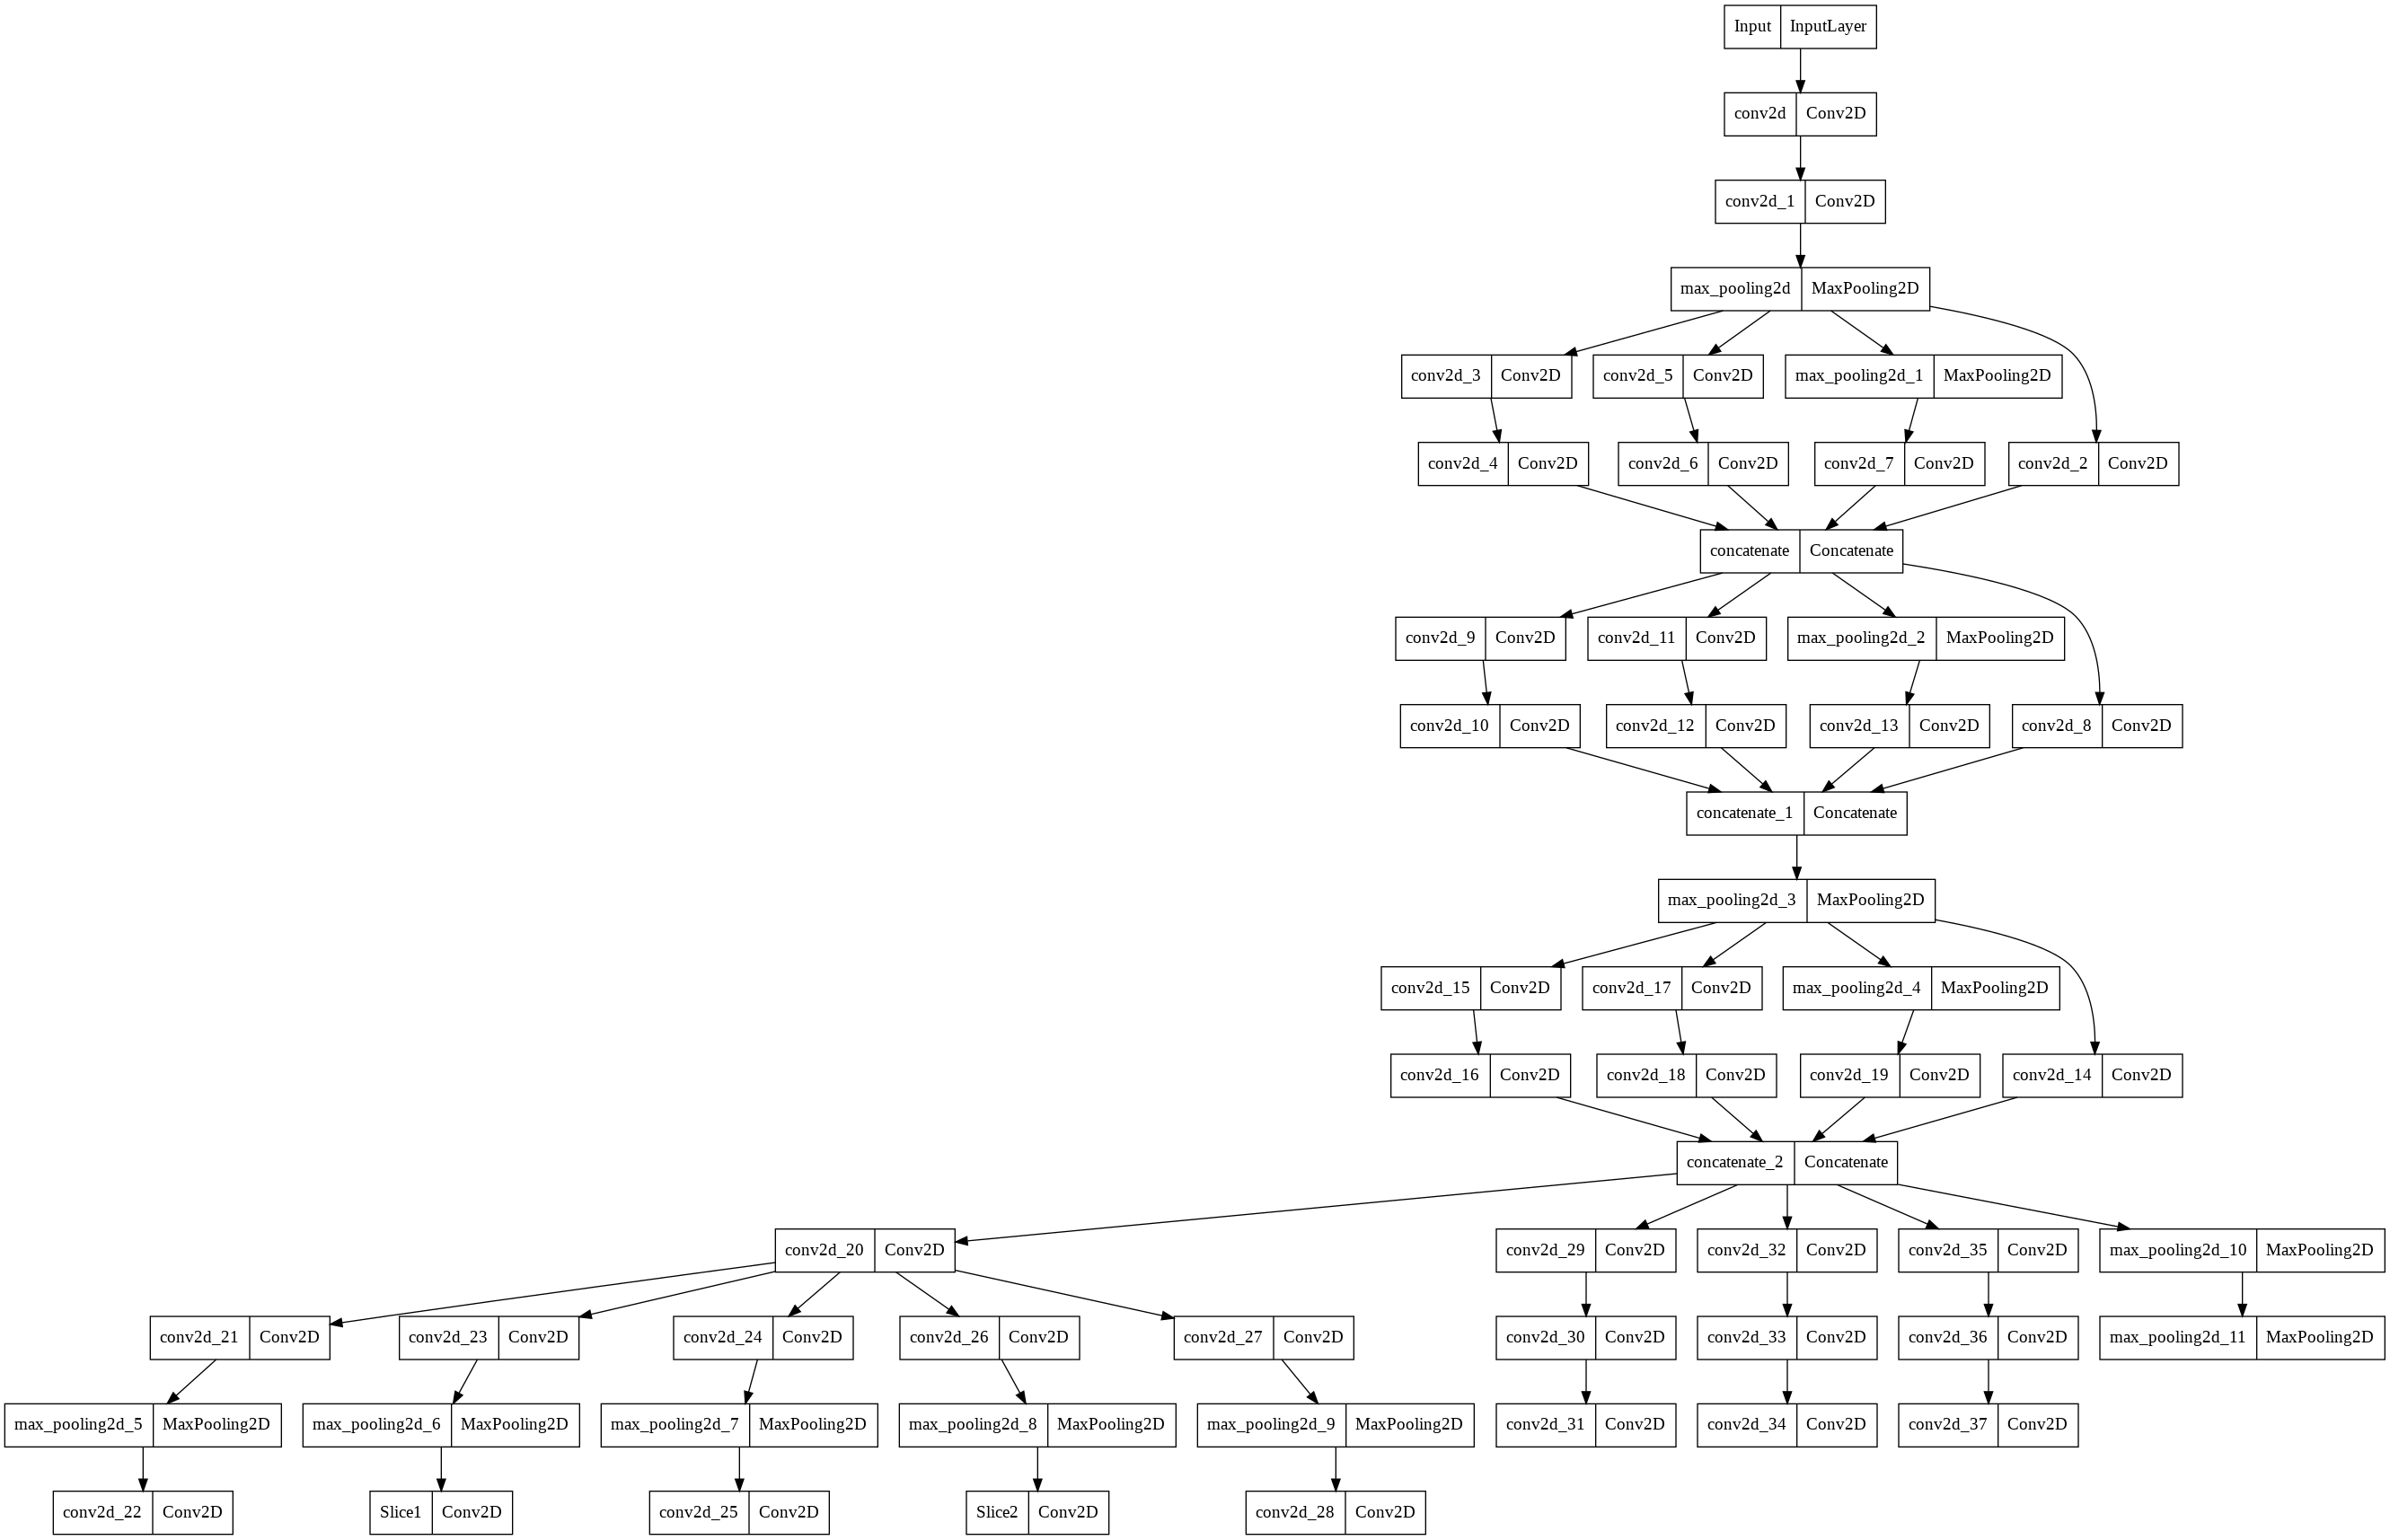

In [6]:
plot_model(tesla_autopilot_model)

In [8]:
tesla_autopilot_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  896         ['Input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 32  9248        ['conv2d[0][0]']                 
                                )                                                             